In [4]:
import pandas as pd
from sklearn.decomposition import PCA

In [10]:
#load Fashion MNIST dataset 
%matplotlib inline
import numpy as np
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [12]:
#normalize the images

x_train = np.expand_dims(x_train/255.0, axis=-1)
x_test = np.expand_dims(x_test/255.0, axis=-1)

In [13]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [20]:
np.squeeze(y_train)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [19]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [16]:
#plot function for sample images

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

def plot_tile(samples):
    
    num_samples, x_dim, y_dim, _ = samples.shape
    axes = (np.round(np.sqrt(num_samples))).astype(int)
    fig = plt.figure(figsize=(axes, axes))
    gs = gridspec.GridSpec(axes, axes)
    gs.update(wspace=0.05, hspace=0.05)

    for i, sample in enumerate(samples):
        ax = plt.subplot(gs[i])
        plt.axis('off')
        ax.set_aspect('equal')
        plt.imshow(sample, cmap=plt.get_cmap('viridis'), aspect='auto')

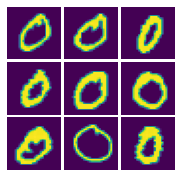

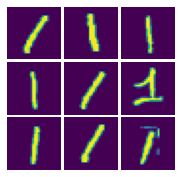

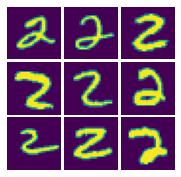

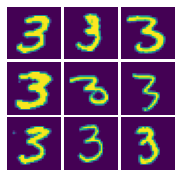

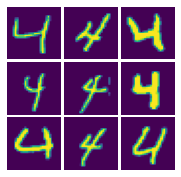

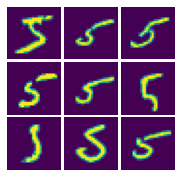

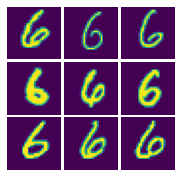

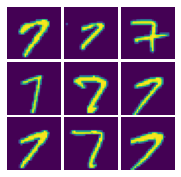

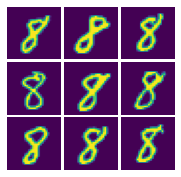

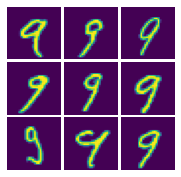

In [21]:
#visualize first 9 samples of input images based on class labels, within the training dataset

unique_labels, label_counts = np.unique(y_train, return_counts=True)

for label in unique_labels:
    x_train_perlabel = x_train[np.squeeze(y_train) == label]
    fig = plot_tile(x_train_perlabel[0:9, :, :])

In [23]:
#create (simulate) a synthetic "time series" data vector (y) for each of the input (x) such that y=Gx and G is linear

#G represents some abstract function (i.e. fluid flow simulator)
G = np.load('G.npy')

y_dim = G.shape[-1]
y_reg_train = np.zeros([y_train.shape[0], y_dim])
y_reg_test = np.zeros([y_test.shape[0], y_dim])

#simulate Y = GX
for i in range(y_train.shape[0]):
    y_reg_train[i:i+1, :] = np.reshape((x_train[i:i+1, :, :, 0]), [1, x_train.shape[1]*x_train.shape[2]])@G

for i in range(y_test.shape[0]):
    y_reg_test[i:i+1, :] = np.reshape((x_test[i:i+1, :, :, 0]), [1, x_test.shape[1]*x_test.shape[2]])@G

print(y_reg_train.shape)
print(y_reg_test.shape)

(60000, 128)
(10000, 128)


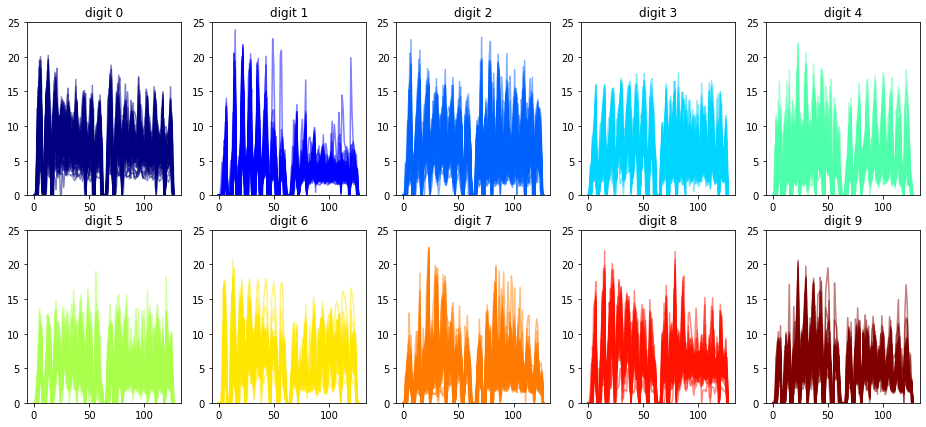

In [24]:
#visualize the generated signals (for training dataset) 

import matplotlib.cm as cm
from matplotlib.colors import Normalize

fig, ax = plt.subplots(1,1, figsize = (16, 7))

my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=9)
cs = my_cmap(my_norm(y_train))

for j in range(10):
    plt.subplot(2, 5, j+1)
    for i in range(500):
        if (y_train[i] == j):
            plt.plot(y_reg_train[i, :], c=cs[i], alpha=0.5)
    plt.ylim([0, 25])
    plt.title('digit '+str(j))

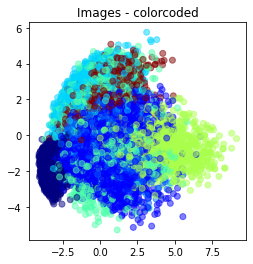

In [26]:
#visualize both x and y with PCA (for training dataset) 

#reduce images to two dimensions to visualize 
data_f = np.reshape(x_train, (-1, 28*28*1))
ratio = 1.0
#pca on dataset
pca = PCA(n_components=16)
pca.fit(data_f)

#store results of PCA in a dataframe
result = pd.DataFrame(pca.transform(data_f), columns=['PCA%i' % i for i in range(16)])

#display some images in 2D
num_samples_disp = 10000

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(result['PCA0'][0:num_samples_disp], result['PCA1'][0:num_samples_disp], c=cs[y_train[0:num_samples_disp]], alpha=0.5)
ax.set_aspect(1.0/ax.get_data_ratio()*ratio)
plt.title('Images - colorcoded')
plt.show()

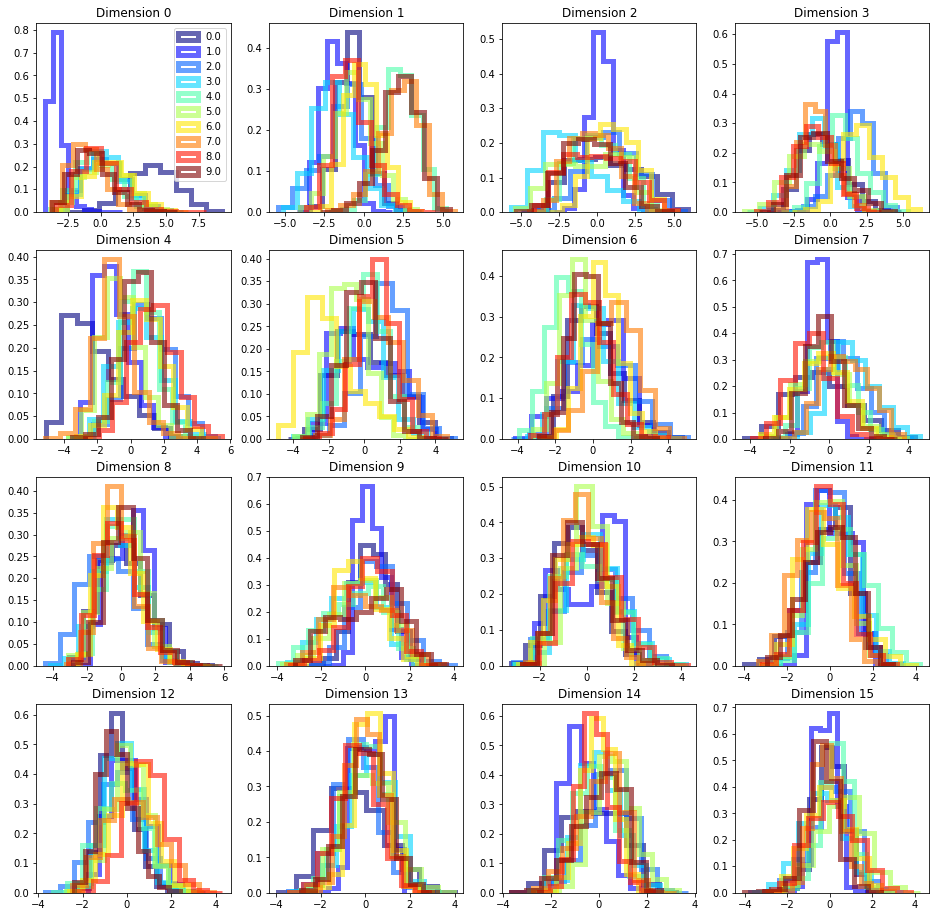

In [27]:
#plot the first 16 PCs of PCA for the middle layer, by digit label

result_np = result.to_numpy()

#color by label
my_cmap = cm.get_cmap('jet')
my_norm = Normalize(vmin=0, vmax=9)
cs = my_cmap(my_norm(np.linspace(0, 9, 10)))

plt.figure(figsize=[16, 16])
xax = np.linspace(0, 15, 16)

for j in range(result_np.shape[1]):
    plt.subplot(4, 4, j+1)
    result_np_dim = result_np[:, j]
    
    for i in range(10):
        result_np_dim_label = result_np_dim[y_train == i]
        plt.hist(result_np_dim_label, color=cs[i], density=True, histtype='step', linewidth=5, alpha=0.6)
    plt.title('Dimension '+str(j))
    if j == 0:
        plt.legend(np.linspace(0, 9, 10))

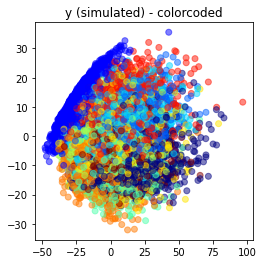

In [28]:
#visualize both x and y with PCA (for training dataset) 

#reduce simulated y to two dimensions to visualize 
data_f = y_reg_train

#pca on dataset
pca = PCA(n_components=2)
pca.fit(data_f)

#store results of PCA in a dataframe
result = pd.DataFrame(pca.transform(data_f), columns=['PCA%i' % i for i in range(2)])

#display some images in 2D
num_samples_disp = 10000

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(result['PCA0'][0:num_samples_disp], result['PCA1'][0:num_samples_disp], c=cs[y_train[0:num_samples_disp]], alpha=0.5)
ax.set_aspect(1.0/ax.get_data_ratio()*ratio)
plt.title('y (simulated) - colorcoded')
plt.show()

In [29]:
result

,PCA0,PCA1
0,0.730324,1.824378
1,8.796120,-6.484897
2,-17.991042,-16.644409
3,-20.313760,18.069082
4,-4.277559,-0.951055
...,...,...
59995,0.519484,13.027305
59996,0.763330,10.740382
59997,-10.542097,-2.820819
59998,-13.398471,-7.984386
